Importing Libraries 

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse , mean_absolute_percentage_error as mape

Loading the dataset

In [2]:
data = pd.read_csv('data.csv')

# Exploring the dataset

In [3]:
data.head()

,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
# number of rows and columns
data.shape

(76014, 15)

In [5]:
# data types
data.dtypes

mid                 int64
date               object
venue              object
batting_team       object
bowling_team       object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [7]:
# check are there any missing values
data.isnull().sum()

mid               0
date              0
venue             0
batting_team      0
bowling_team      0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [8]:
# check are there any duplicates
data.duplicated().sum()

0

# Cleaning Data



In [9]:
# Remove unnecessary variables
irrelevent = ['date','mid','batsman','bowler','striker','non-striker','venue']
data1 = data.drop(irrelevent, axis=1)
data1.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [10]:
# Find team names
print('Batting Teams: ',data1['batting_team'].unique(),'\n')
print('Bowling Teams: ',data1['bowling_team'].unique())

Batting Teams:  ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant'] 

Bowling Teams:  ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Kolkata Knight Riders' 'Rajasthan Royals' 'Mumbai Indians'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant']


In [11]:
# Team Name Changes
data2 = data1.replace(['Deccan Chargers', 'Delhi Daredevils', 'Kings XI Punjab'], ['Sunrisers Hyderabad', 'Delhi Capitals', 'Punjab Kings'], regex = False)

In [12]:
# check team names
print('Batting Teams: ',data1['batting_team'].unique(),'\n')
print('Bowling Teams: ',data1['bowling_team'].unique())

Batting Teams:  ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant'] 

Bowling Teams:  ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Kolkata Knight Riders' 'Rajasthan Royals' 'Mumbai Indians'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant']


In [13]:
# Removing teams that are not currently playing
requiredTeams = ['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Sunrisers Hyderabad']
data3 = data2[(data2['batting_team'].isin(requiredTeams)) & (data2['bowling_team'].isin(requiredTeams))]
data3.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [14]:
# Removing the 1st 5 overs
data4 = data3.loc[(data3['overs']>5.0)]
data4.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


# Splitting the data into train and test set

In [15]:
X = data4.drop(['total'], axis=1)
y = data4['total']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Data analysis and Visualization

In [17]:
# create train set
train = X_train.assign(total = Y_train)
train.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
54707,Rajasthan Royals,Mumbai Indians,142,3,16.2,59,2,189
25639,Mumbai Indians,Punjab Kings,35,1,5.4,33,1,159
55544,Rajasthan Royals,Punjab Kings,82,5,11.4,36,2,162
33896,Punjab Kings,Chennai Super Kings,76,1,9.5,38,1,156
3850,Chennai Super Kings,Punjab Kings,100,3,10.6,46,1,181


In [18]:
#Number of rows and columns
train.shape

(37230, 8)

In [19]:
#Data info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37230 entries, 54707 to 3707
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   batting_team    37230 non-null  object 
 1   bowling_team    37230 non-null  object 
 2   runs            37230 non-null  int64  
 3   wickets         37230 non-null  int64  
 4   overs           37230 non-null  float64
 5   runs_last_5     37230 non-null  int64  
 6   wickets_last_5  37230 non-null  int64  
 7   total           37230 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.6+ MB


In [20]:
train.describe()

,runs,wickets,overs,runs_last_5,wickets_last_5,total
count,37230.000000,37230.000000,37230.00000,37230.000000,37230.000000,37230.000000
mean,94.717674,3.054687,12.31430,38.758797,1.317647,161.717486
std,40.673409,1.891768,4.32178,11.498618,1.053174,29.143449
min,13.000000,0.000000,5.10000,10.000000,0.000000,67.000000
25%,62.000000,2.000000,8.50000,31.000000,1.000000,142.000000
50%,90.000000,3.000000,12.30000,38.000000,1.000000,163.000000
75%,123.000000,4.000000,16.20000,46.000000,2.000000,182.000000
max,246.000000,10.000000,19.60000,94.000000,7.000000,246.000000


In [21]:
# Highest totals 
df_total = train.filter(['batting_team', 'bowling_team' , 'total'])
df_total = df_total.drop_duplicates(subset = ["total"]) 
df_total = df_total.sort_values(["total"], ascending=False)
df_total.head()

,batting_team,bowling_team,total
17502,Chennai Super Kings,Rajasthan Royals,246
194,Chennai Super Kings,Punjab Kings,240
60483,Royal Challengers Bangalore,Mumbai Indians,235
28305,Punjab Kings,Royal Challengers Bangalore,232
51427,Punjab Kings,Chennai Super Kings,231


C:\Users\Star Gate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


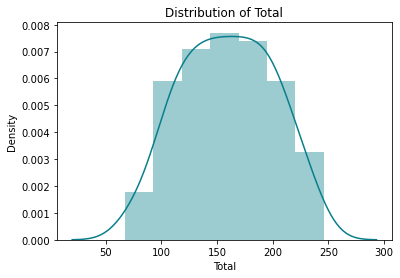

In [22]:
# Distribution plot of Total
plt.figure(figsize=(6,4))
sns.distplot(df_total['total'],color = '#087E8B')
plt.title('Distribution of Total')
plt.xlabel('Total')
plt.ylabel('Density')
plt.show()

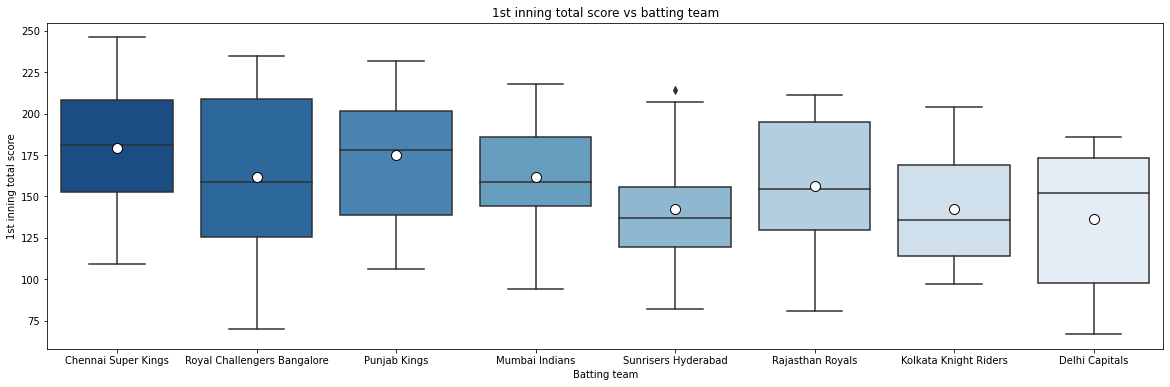

In [23]:
# Box Plot - Batting team vs Total
plt.figure(figsize=(20,6))
sns.boxplot(x="batting_team", y="total", data= df_total, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},
            palette="Blues_r")
plt.title('1st inning total score vs batting team')
plt.xlabel('Batting team')
plt.ylabel('1st inning total score')
plt.show()

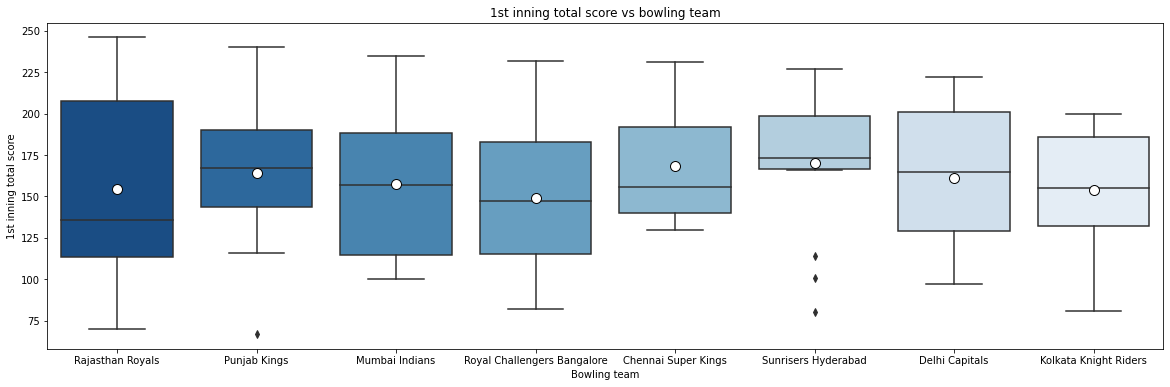

In [24]:
# Box Plot - Bowling team vs Total
plt.figure(figsize=(20,6))
sns.boxplot(x="bowling_team", y="total", data=df_total, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},
            palette="Blues_r")
plt.title('1st inning total score vs bowling team')
plt.xlabel('Bowling team')
plt.ylabel('1st inning total score')
plt.show()

In [25]:
#Team average 1st inning total
cskt = 0; cskn = 0
rcbt = 0; rcbn = 0
pkt = 0; pkn = 0
mit = 0; min = 0
srht = 0; srhn = 0
rrt = 0; rrn = 0
kkrt = 0; kkrn = 0
dct = 0; dcn = 0
for i in range(131):
  if df_total['batting_team'].iloc[i]=='Chennai Super Kings':
    cskn = cskn + 1
    cskt = cskt + df_total['total'].iloc[i]
  elif df_total['batting_team'].iloc[i]=='Royal Challengers Bangalore':
    rcbn = rcbn+1
    rcbt = rcbt+df_total['total'].iloc[i]
  elif df_total['batting_team'].iloc[i]=='Punjab Kings':
    pkn = pkn+1
    pkt = pkt+df_total['total'].iloc[i]
  elif df_total['batting_team'].iloc[i]=='Mumbai Indians':
    min = min+1
    mit = mit+df_total['total'].iloc[i]
  elif df_total['batting_team'].iloc[i]=='Sunrisers Hyderabad':
    srhn = srhn+1
    srht = srht+df_total['total'].iloc[i]
  elif df_total['batting_team'].iloc[i]=='Rajasthan Royals':
    rrn = rrn+1
    rrt = rrt+df_total['total'].iloc[i]
  elif df_total['batting_team'].iloc[i]=='Kolkata Knight Riders':
    kkrn = kkrn+1
    kkrt = kkrt+df_total['total'].iloc[i]
  elif df_total['batting_team'].iloc[i]=='Delhi Capitals':
    dcn = dcn+1
    dct = dct+df_total['total'].iloc[i]

 
avgtotal = {'Team':['Chennai Super Kings', 'Royal Challengers Bangalore', 'Punjab Kings',
                                             'Mumbai Indians', 'Sunrisers Hyderabad', 'Rajasthan Royals',
                                             'Kolkata Knight Riders', 'Delhi Capitals'],
        'Average_Total':[round(cskt/cskn), round(rcbt/rcbn), round(pkt/pkn), round(mit/min), round(srht/srhn), round(rrt/rrn), round(kkrt/kkrn), round(dct/dcn)]}

df_avgtotal = pd.DataFrame(avgtotal)
df_avgtotal = df_avgtotal.sort_values(["Average_Total"], ascending=False)
df_avgtotal

,Team,Average_Total
0,Chennai Super Kings,179
2,Punjab Kings,175
1,Royal Challengers Bangalore,162
3,Mumbai Indians,162
5,Rajasthan Royals,156
4,Sunrisers Hyderabad,142
6,Kolkata Knight Riders,142
7,Delhi Capitals,142


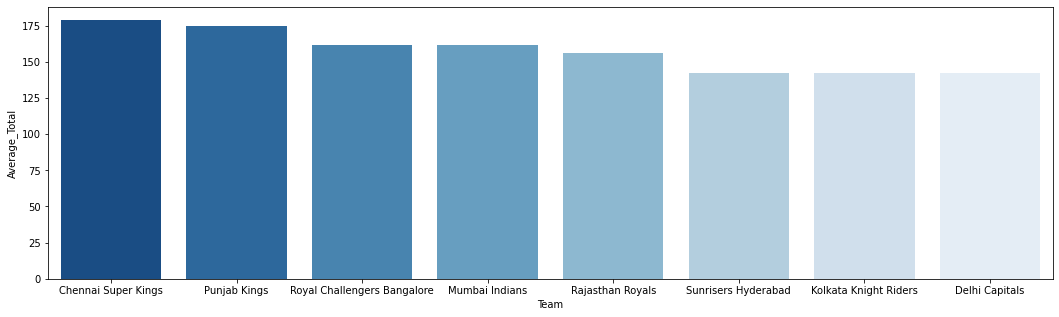

In [26]:
plt.figure(figsize=(18,5))
sns.barplot(x="Team", y="Average_Total",data = df_avgtotal, ci = None, palette="Blues_r")
plt.show()

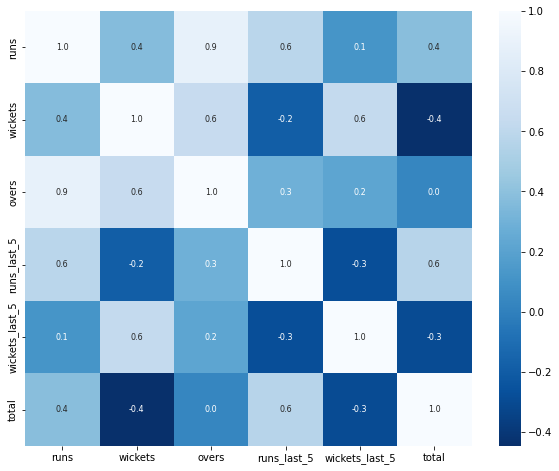

In [27]:
# Correlation matrix - quantitative variables
plt.figure(figsize=(10,8))
sns.heatmap(train.drop(['batting_team'	,'bowling_team'], axis=1).corr(),cbar=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues_r')
plt.show()

In [29]:
!pip install dython

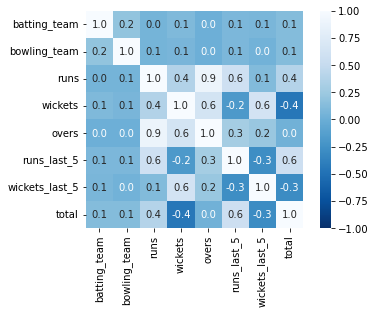

{'corr':                 batting_team  bowling_team      runs   wickets     overs  \
 batting_team        1.000000      0.188004  0.047799  0.097246  0.010752   
 bowling_team        0.188004      1.000000  0.053288  0.063515  0.009185   
 runs                0.047799      0.053288  1.000000  0.371298  0.883488   
 wickets             0.097246      0.063515  0.371298  1.000000  0.639162   
 overs               0.010752      0.009185  0.883488  0.639162  1.000000   
 runs_last_5         0.082657      0.085610  0.584049 -0.186263  0.294036   
 wickets_last_5      0.074268      0.031902  0.114336  0.632142  0.219591   
 total               0.120802      0.124341  0.383772 -0.445812  0.029181   
 
                 runs_last_5  wickets_last_5     total  
 batting_team       0.082657        0.074268  0.120802  
 bowling_team       0.085610        0.031902  0.124341  
 runs               0.584049        0.114336  0.383772  
 wickets           -0.186263        0.632142 -0.445812  
 overs      

In [30]:
# dython - all the variables
from dython.nominal import associations
associations(train, fmt='.1f', cmap='Blues_r')

# One hot encoding

In [31]:
# Converting categorical features using OneHotEncoding method
encoded_Xtrain = pd.get_dummies(data= X_train, columns=['batting_team', 'bowling_team'])
encoded_Xtest = pd.get_dummies(data= X_test, columns=['batting_team', 'bowling_team'])

In [32]:
# Check the columns
encoded_Xtrain.columns

Index(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'batting_team_Chennai Super Kings', 'batting_team_Delhi Capitals',
       'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians',
       'batting_team_Punjab Kings', 'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Chennai Super Kings',
       'bowling_team_Delhi Capitals', 'bowling_team_Kolkata Knight Riders',
       'bowling_team_Mumbai Indians', 'bowling_team_Punjab Kings',
       'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad'],
      dtype='object')

In [33]:
# Rearranging the columns
X_train = encoded_Xtrain [[ 'batting_team_Chennai Super Kings',
       'batting_team_Delhi Capitals', 'batting_team_Punjab Kings',
       'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians',
       'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Chennai Super Kings',
       'bowling_team_Delhi Capitals', 'bowling_team_Punjab Kings',
       'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians',
       'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5']]

X_test = encoded_Xtest [['batting_team_Chennai Super Kings',
       'batting_team_Delhi Capitals', 'batting_team_Punjab Kings',
       'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians',
       'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Chennai Super Kings',
       'bowling_team_Delhi Capitals', 'bowling_team_Punjab Kings',
       'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians',
       'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5']]

# Model Building

Linear Regression Model

In [34]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,Y_train)

LinearRegression()

In [35]:
# Predicting results
Ytrain_predict_lm = linear_regressor.predict(X_train)
Ytest_predict_lm = linear_regressor.predict(X_test)

In [36]:
# Linear Regression - Model Evaluation
print("Linear Regression - Model Evaluation \n")
linear_reg = pd.DataFrame({
    'Criteria' : ['MAE','MAPE%', 'RMSE'],
    'Train_set' : [round(mae(Y_train, Ytrain_predict_lm),3),round(mape(Y_train, Ytrain_predict_lm)*100,3), round(np.sqrt(mse(Y_train, Ytrain_predict_lm)),3)],
    'Test_set' : [round(mae(Y_test, Ytest_predict_lm),3), round(mape(Y_test, Ytest_predict_lm)*100,3) , round(np.sqrt(mse(Y_test, Ytest_predict_lm)),3)],
})
linear_reg

Linear Regression - Model Evaluation 



,Criteria,Train_set,Test_set
0,MAE,12.939,12.866
1,MAPE%,8.603,8.485
2,RMSE,17.234,17.015


In [37]:
#Important variables
importances_lr = pd.DataFrame(data = {'Attribute': encoded_Xtrain.columns, 'Importance': linear_regressor.coef_})
importances_lr = importances_lr.sort_values(by='Importance', ascending = False)
importances_lr

,Attribute,Importance
4,wickets_last_5,3.448935
6,batting_team_Delhi Capitals,3.376225
10,batting_team_Rajasthan Royals,2.132473
15,bowling_team_Kolkata Knight Riders,1.776569
2,overs,1.132227
0,runs,0.993016
16,bowling_team_Mumbai Indians,0.983945
9,batting_team_Punjab Kings,0.843755
13,bowling_team_Chennai Super Kings,0.291495
8,batting_team_Mumbai Indians,0.068763


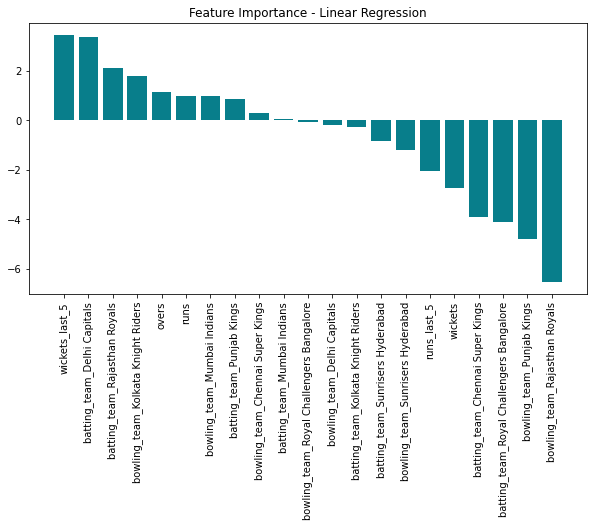

In [38]:
#plot
plt.figure(figsize=(10,5))
plt.bar(x=importances_lr['Attribute'], height = importances_lr['Importance'], color = '#087E8B')
plt.title('Feature Importance - Linear Regression')
plt.xticks(rotation='vertical')
plt.show()

Ridge Regression

In [39]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,Y_train)

C:\Users\Star Gate\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.64504e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Star Gate\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.55789e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Star Gate\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.53101e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Star Gate\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.48494e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Star Gate\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.54084e-18): result

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [40]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-297.3587865336973


In [41]:
Ytrain_predict_rr=ridge_regressor.predict(X_train)
Ytest_predict_rr=ridge_regressor.predict(X_test)

In [42]:
# Ridge Regression - Model Evaluation
print("Ridge Regression - Model Evaluation \n")
ridge_reg = pd.DataFrame({
    'Criteria' : ['MAE','MAPE%', 'RMSE'],
    'Train_set' : [round(mae(Y_train, Ytrain_predict_rr),3),round(mape(Y_train, Ytrain_predict_rr)*100,3), round(np.sqrt(mse(Y_train, Ytrain_predict_rr)),3)],
    'Test_set' : [round(mae(Y_test, Ytest_predict_rr),3), round(mape(Y_test, Ytest_predict_rr)*100,3) , round(np.sqrt(mse(Y_test, Ytest_predict_rr)),3)],
})
ridge_reg


Ridge Regression - Model Evaluation 



,Criteria,Train_set,Test_set
0,MAE,12.937,12.863
1,MAPE%,8.602,8.484
2,RMSE,17.234,17.014


In [43]:
importances_rr = pd.DataFrame(data = {'Attribute': encoded_Xtrain.columns, 'Importance': ridge_regressor.best_estimator_.coef_})
importances_rr = importances_rr.sort_values(by='Importance', ascending = False)
importances_rr

,Attribute,Importance
4,wickets_last_5,3.421762
6,batting_team_Delhi Capitals,3.344760
10,batting_team_Rajasthan Royals,2.113155
15,bowling_team_Kolkata Knight Riders,1.760334
2,overs,1.115223
0,runs,0.984196
16,bowling_team_Mumbai Indians,0.983566
9,batting_team_Punjab Kings,0.841842
13,bowling_team_Chennai Super Kings,0.294666
8,batting_team_Mumbai Indians,0.070567


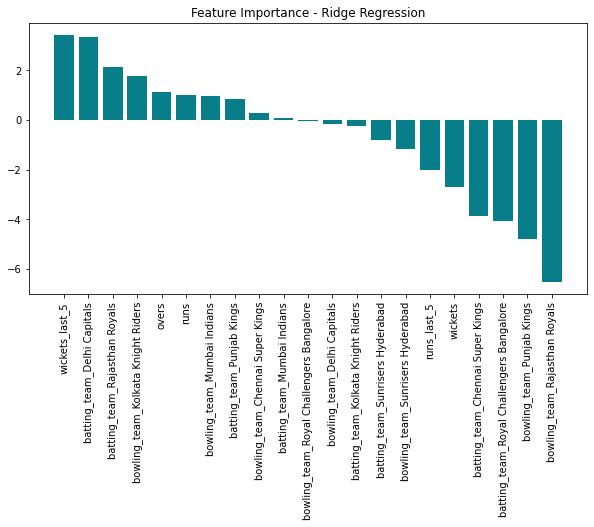

In [44]:
plt.figure(figsize=(10,5))
plt.bar(x=importances_rr['Attribute'], height = importances_rr['Importance'], color = '#087E8B')
plt.title('Feature Importance - Ridge Regression')
plt.xticks(rotation='vertical')
plt.show()

Lasso Regression

In [45]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [46]:
lasso_regressor.fit(X_train,Y_train)

C:\Users\Star Gate\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4368603.829027731, tolerance: 2516.1702912033306
  model = cd_fast.enet_coordinate_descent(
C:\Users\Star Gate\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4400207.323957447, tolerance: 2543.394299100188
  model = cd_fast.enet_coordinate_descent(
C:\Users\Star Gate\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4392436.280852087, tolerance: 2523.4129529378197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Star Gate\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530:

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [47]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-297.35949560234116


In [48]:
Ytrain_predict_lr=lasso_regressor.predict(X_train)
Ytest_predict_lr=lasso_regressor.predict(X_test)

In [49]:
# Lasso Regression - Model Evaluation
print("Lasso Regression - Model Evaluation \n")
lasso_reg = pd.DataFrame({
    'Criteria' : ['MAE','MAPE%', 'RMSE'],
    'Train_set' : [round(mae(Y_train, Ytrain_predict_lr),3),round(mape(Y_train, Ytrain_predict_lr)*100,3), round(np.sqrt(mse(Y_train, Ytrain_predict_lr)),3)],
    'Test_set' : [round(mae(Y_test, Ytest_predict_lr),3), round(mape(Y_test, Ytest_predict_lr)*100,3) , round(np.sqrt(mse(Y_test, Ytest_predict_lr)),3)],
})
lasso_reg

Lasso Regression - Model Evaluation 



,Criteria,Train_set,Test_set
0,MAE,12.938,12.865
1,MAPE%,8.603,8.485
2,RMSE,17.234,17.014


In [50]:
importances_lar = pd.DataFrame(data = {'Attribute': encoded_Xtrain.columns, 'Importance': lasso_regressor.best_estimator_.coef_})
importances_lar = importances_lar.sort_values(by='Importance', ascending = False)
importances_lar

,Attribute,Importance
4,wickets_last_5,3.078521
6,batting_team_Delhi Capitals,3.004704
10,batting_team_Rajasthan Royals,1.971318
15,bowling_team_Kolkata Knight Riders,1.617076
16,bowling_team_Mumbai Indians,0.983845
2,overs,0.758004
9,batting_team_Punjab Kings,0.686573
0,runs,0.623150
13,bowling_team_Chennai Super Kings,0.132514
19,bowling_team_Royal Challengers Bangalore,-0.062256


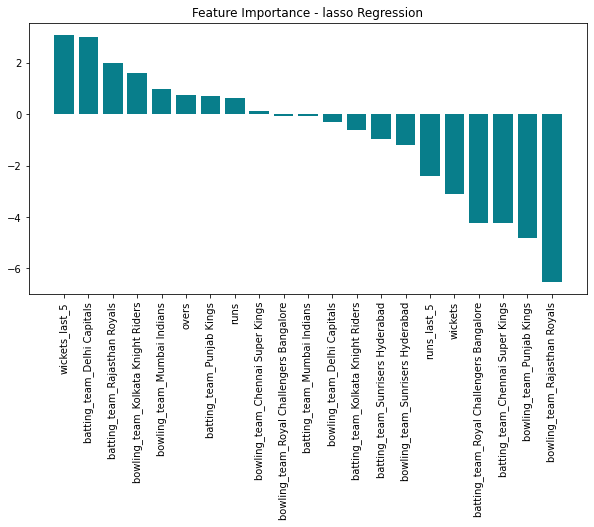

In [51]:
plt.figure(figsize=(10,5))
plt.bar(x=importances_lar['Attribute'], height = importances_lar['Importance'], color = '#087E8B')
plt.title('Feature Importance - lasso Regression')
plt.xticks(rotation='vertical')
plt.show()

Elastic Net Regression

In [52]:
enet=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-2,1,5,10,20,30,35,40]}
enet_regressor=GridSearchCV(enet,parameters,scoring='neg_mean_squared_error',cv=5)

In [53]:
enet_regressor.fit(X_train,Y_train)

C:\Users\Star Gate\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4383417.0255670175, tolerance: 2516.1702912033306
  model = cd_fast.enet_coordinate_descent(
C:\Users\Star Gate\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4413122.053859345, tolerance: 2543.394299100188
  model = cd_fast.enet_coordinate_descent(
C:\Users\Star Gate\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4370254.344104888, tolerance: 2523.4129529378197
  model = cd_fast.enet_coordinate_descent(
C:\Users\Star Gate\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 5, 10, 20, 30,
                                   35, 40]},
             scoring='neg_mean_squared_error')

In [54]:
print(enet_regressor.best_params_)
print(enet_regressor.best_score_)

{'alpha': 1e-08}
-297.36050471059036


In [55]:
Ytrain_predict_enet=enet_regressor.predict(X_train)
Ytest_predict_enet=enet_regressor.predict(X_test)

In [56]:
# Elastic Net Regression - Model Evaluation
print("Elastic Net Regression - Model Evaluation \n")
enet_reg = pd.DataFrame({
    'Criteria' : ['MAE','MAPE%', 'RMSE'],
    'Train_set' : [round(mae(Y_train, Ytrain_predict_enet),3),round(mape(Y_train, Ytrain_predict_enet)*100,3), round(np.sqrt(mse(Y_train, Ytrain_predict_enet)),3)],
    'Test_set' : [round(mae(Y_test, Ytest_predict_enet),3), round(mape(Y_test, Ytest_predict_enet)*100,3) , round(np.sqrt(mse(Y_test, Ytest_predict_enet)),3)],
})
enet_reg

Elastic Net Regression - Model Evaluation 



,Criteria,Train_set,Test_set
0,MAE,12.939,12.866
1,MAPE%,8.603,8.485
2,RMSE,17.234,17.015


In [57]:
importances_er = pd.DataFrame(data = {'Attribute': encoded_Xtrain.columns, 'Importance': enet_regressor.best_estimator_.coef_})
importances_er = importances_er.sort_values(by='Importance', ascending = False)
importances_er

,Attribute,Importance
4,wickets_last_5,3.090664
6,batting_team_Delhi Capitals,3.017953
10,batting_team_Rajasthan Royals,2.146248
15,bowling_team_Kolkata Knight Riders,1.790344
16,bowling_team_Mumbai Indians,0.983945
9,batting_team_Punjab Kings,0.857530
2,overs,0.773956
0,runs,0.634745
13,bowling_team_Chennai Super Kings,0.305270
8,batting_team_Mumbai Indians,0.082538


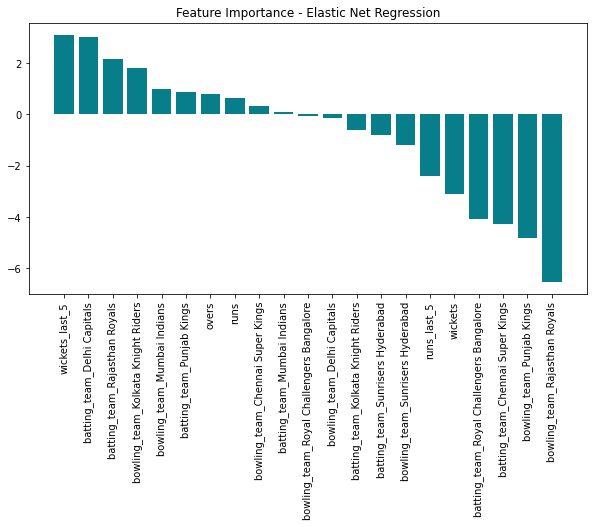

In [58]:
plt.figure(figsize=(10,5))
plt.bar(x=importances_er['Attribute'], height = importances_er['Importance'], color = '#087E8B')
plt.title('Feature Importance - Elastic Net Regression')
plt.xticks(rotation='vertical')
plt.show()

Random Forest Regression

In [59]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [50, 100, 500], 'min_samples_leaf' : [1,2,3] }

In [60]:
rfr = RandomForestRegressor(random_state = 1)

In [61]:
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)

In [62]:
g_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [63]:
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 500}


In [64]:
# Predicting results
Ytrain_predict_rf = g_search.predict(X_train)
Ytest_predict_rf = g_search.predict(X_test)

In [65]:
# Random Forest Regression - Model Evaluation
print("Random Forest Regression - Model Evaluation \n")
rf_reg = pd.DataFrame({
    'Criteria' : ['MAE','MAPE%', 'RMSE'],
    'Train_set' : [round(mae(Y_train, Ytrain_predict_rf),3),round(mape(Y_train, Ytrain_predict_rf)*100,3), round(np.sqrt(mse(Y_train, Ytrain_predict_rf)),3)],
    'Test_set' : [round(mae(Y_test, Ytest_predict_rf),3), round(mape(Y_test, Ytest_predict_rf)*100,3) , round(np.sqrt(mse(Y_test, Ytest_predict_rf)),3)],
})
rf_reg

Random Forest Regression - Model Evaluation 



,Criteria,Train_set,Test_set
0,MAE,1.657,4.509
1,MAPE%,1.072,2.873
2,RMSE,2.769,7.395


In [66]:
importances_rf = pd.DataFrame(data = {'Attribute': encoded_Xtrain.columns, 'Importance': g_search.best_estimator_.feature_importances_})
importances_rf = importances_rf.sort_values(by='Importance', ascending = False)
importances_rf

,Attribute,Importance
16,bowling_team_Mumbai Indians,0.237899
19,bowling_team_Royal Challengers Bangalore,0.235990
17,bowling_team_Punjab Kings,0.182790
18,bowling_team_Rajasthan Royals,0.114360
20,bowling_team_Sunrisers Hyderabad,0.055493
10,batting_team_Rajasthan Royals,0.012958
1,wickets,0.012577
13,bowling_team_Chennai Super Kings,0.011711
14,bowling_team_Delhi Capitals,0.011652
6,batting_team_Delhi Capitals,0.011274


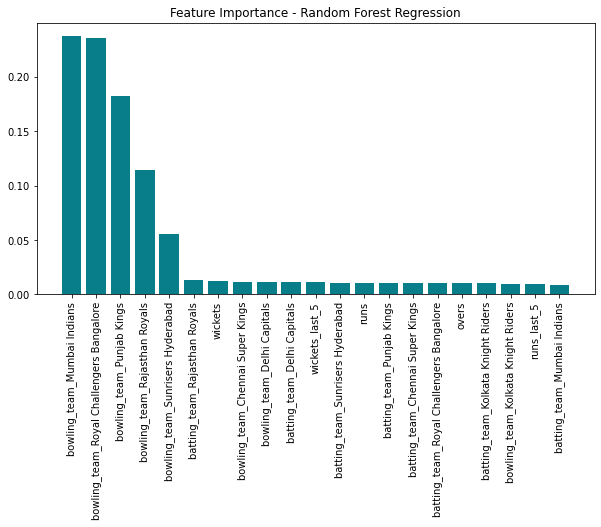

In [67]:
plt.figure(figsize=(10,5))
plt.bar(x=importances_rf['Attribute'], height = importances_rf['Importance'], color = '#087E8B')
plt.title('Feature Importance - Random Forest Regression')
plt.xticks(rotation='vertical')
plt.show()

Neural Network

In [68]:
neural_net = MLPRegressor(activation='logistic', max_iter=500)
neural_net.fit(X_train, Y_train)

C:\Users\Star Gate\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='logistic', max_iter=500)

In [69]:
# Predicting results
Ytrain_predict_nn = neural_net.predict(X_train)
Ytest_predict_nn = neural_net.predict(X_test)

In [70]:
# Neural Network - Model Evaluation
print("Neural Network - Model Evaluation \n")
neural_net = pd.DataFrame({
    'Criteria' : ['MAE','MAPE%', 'RMSE'],
    'Train_set' : [round(mae(Y_train, Ytrain_predict_nn),3),round(mape(Y_train, Ytrain_predict_nn)*100,3), round(np.sqrt(mse(Y_train, Ytrain_predict_nn)),3)],
    'Test_set' : [round(mae(Y_test, Ytest_predict_nn),3), round(mape(Y_test, Ytest_predict_nn)*100,3) , round(np.sqrt(mse(Y_test, Ytest_predict_nn)),3)],
})
neural_net

Neural Network - Model Evaluation 



,Criteria,Train_set,Test_set
0,MAE,8.197,8.407
1,MAPE%,5.296,5.397
2,RMSE,11.373,11.541


# Compare Models

RMSE

In [71]:
compareRMSE = pd.DataFrame({
    'Model' : ['Linear Reg.','Ridge Reg.', 'Lasso Reg.', 'Elastic Net Reg.', 'Random Forest', 'Neural Network',
               'Linear Reg.','Ridge Reg.', 'Lasso Reg.', 'Elastic Net Reg.', 'Random Forest', 'Neural Network'],
    'RMSE' : [np.sqrt(mse(Y_train, Ytrain_predict_lm)),np.sqrt(mse(Y_train, Ytrain_predict_rr)), np.sqrt(mse(Y_train, Ytrain_predict_lr)) ,
              np.sqrt(mse(Y_train, Ytrain_predict_enet)), np.sqrt(mse(Y_train, Ytrain_predict_rf)), np.sqrt(mse(Y_train, Ytrain_predict_nn)),
              np.sqrt(mse(Y_test, Ytest_predict_lm)), np.sqrt(mse(Y_test, Ytest_predict_rr)), np.sqrt(mse(Y_test, Ytest_predict_lr)),
              np.sqrt(mse(Y_test, Ytest_predict_enet)), np.sqrt(mse(Y_test, Ytest_predict_rf)), np.sqrt(mse(Y_test, Ytest_predict_nn))],
    'Train_or_Test' : ['Train', 'Train', 'Train', 'Train', 'Train','Train','Test','Test','Test','Test','Test', 'Test']
})
compareRMSE


,Model,RMSE,Train_or_Test
0,Linear Reg.,17.234333,Train
1,Ridge Reg.,17.234355,Train
2,Lasso Reg.,17.234337,Train
3,Elastic Net Reg.,17.234333,Train
4,Random Forest,2.768994,Train
5,Neural Network,11.372727,Train
6,Linear Reg.,17.014622,Test
7,Ridge Reg.,17.013937,Test
8,Lasso Reg.,17.014486,Test
9,Elastic Net Reg.,17.014622,Test


In [ ]:
plt.figure(figsize=(15,4))
RMSEplot = sns.barplot(x = "Model", y = "RMSE", hue = "Train_or_Test" , data = compareRMSE, palette="Blues_r")
plt.xticks(rotation=35)
for p in RMSEplot.patches:
    RMSEplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.title('Model Comparison - RMSE')
plt.xlabel('Model')
plt.ylabel('RMSE value')
plt.show()

MAPE

In [72]:
compareMAPE = pd.DataFrame({
    'Model' : ['Linear Reg.','Ridge Reg.', 'Lasso Reg.', 'Elastic Net Reg.', 'Random Forest', 'Neural Network',
               'Linear Reg.','Ridge Reg.', 'Lasso Reg.', 'Elastic Net Reg.', 'Random Forest', 'Neural Network'],
    'MAPE%' : [mape(Y_train, Ytrain_predict_lm)*100,mape(Y_train, Ytrain_predict_rr)*100, mape(Y_train, Ytrain_predict_lr)*100 ,
              mape(Y_train, Ytrain_predict_enet)*100, mape(Y_train, Ytrain_predict_rf)*100, mape(Y_train, Ytrain_predict_nn)*100,
              mape(Y_test, Ytest_predict_lm)*100, mape(Y_test, Ytest_predict_rr)*100, mape(Y_test, Ytest_predict_lr)*100,
              mape(Y_test, Ytest_predict_enet)*100, mape(Y_test, Ytest_predict_rf)*100, mape(Y_test, Ytest_predict_nn)*100],
    'Train_or_Test' : ['Train', 'Train', 'Train', 'Train', 'Train','Train','Test','Test','Test','Test','Test', 'Test']
})
compareMAPE

,Model,MAPE%,Train_or_Test
0,Linear Reg.,8.603066,Train
1,Ridge Reg.,8.602184,Train
2,Lasso Reg.,8.602681,Train
3,Elastic Net Reg.,8.603066,Train
4,Random Forest,1.072348,Train
5,Neural Network,5.296183,Train
6,Linear Reg.,8.485429,Test
7,Ridge Reg.,8.484237,Test
8,Lasso Reg.,8.484988,Test
9,Elastic Net Reg.,8.485429,Test


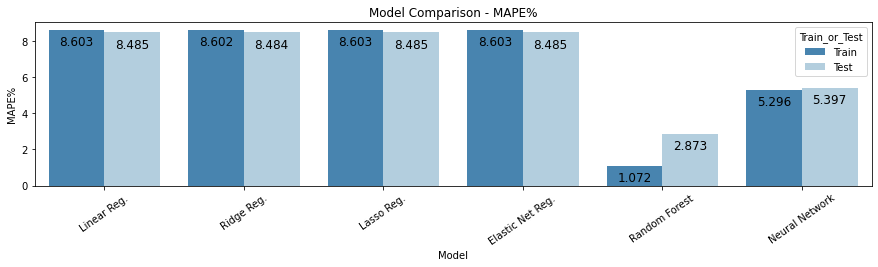

In [73]:
plt.figure(figsize=(15,3))
MAPEplot = sns.barplot(x = "Model", y = "MAPE%", hue = "Train_or_Test" , data = compareMAPE, palette="Blues_r")
plt.xticks(rotation=35)
for p in MAPEplot.patches:
    MAPEplot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.title('Model Comparison - MAPE%')
plt.xlabel('Model')
plt.ylabel('MAPE%')
plt.show()

# Saving the model

In [74]:
filename = 'IPLModel.pkl'
pickle.dump(g_search, open(filename, 'wb'))